# Results and Conclusions 

### Step Forward Variable Selection Was the Best Model 

We succeeded in improving upon our baseline models' abilities to predict HCI with both the PCA and the Step Forward modeling approaches.

The Step Forward Variable Selection model turned out to do the best job of predicting HCI on the baseline and 6 month datasets, while PCA and Step Forward had roughly equal predictive abilities on the 12 month dataset (see bar plots below). Step Forward improved the R2 score of the best baseline (ADAS) by about 0.15. 
The Random Forest and Most Significant Predictor models had worse predictive abilities than both baseline models.

Many of our models had high variance (see the box plot comparison below). The Step Forward model had the least variance in test R2 scores of all models that we tested. 

Because of the high R2 scores and relatively low variance that we observed, we conclude that Step Forward was the best approach for predicting HCI from cognitive test score answers. 

### Result Visualization

**R2 Score Comparisons** In the following three bar plots, we noted that Step Forward and PCA has higher mean test R2 scores on the baseline dataset. We also observed differences that the results of the PCA fit became increasingly similar to those of the Step Forward as time progressed from the baseline visit to 6 months and then to 12 months.

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
import seaborn as sns
import time
import re
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from os import chdir
from sklearn import decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeCV

%matplotlib inline

#Set styles
sns.set_style('white')
sns.set_context('talk')

#Load dataframe holding datasets of the trial iterations on every model
trial_data = pd.read_csv("trial-results.csv").drop("Unnamed: 0", axis = 1)


/Applications/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


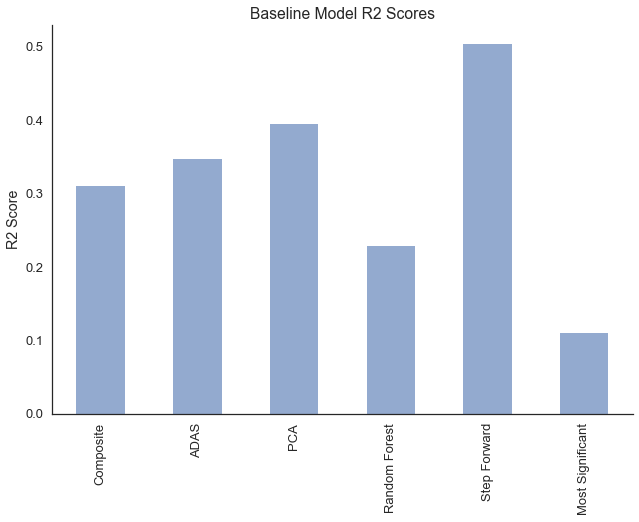

In [6]:

test_names = ["Composite", "ADAS", "PCA", "Random Forest", "Step Forward", "Most Significant"]
base_scores = pd.DataFrame([0.310262, 0.347, 0.39485779299003915, 0.228166, 0.504240, 0.11], index = test_names)
m06_scores = pd.DataFrame([0.41698291521767494, 0.500132, 0.28], index = ["PCA", "Step Forward", "Most Significant"])
m12_scores = pd.DataFrame([0.452928163957854, 0.455448, 0.350597], index = ["PCA", "Step Forward", "Most Significant"])

base_scores.plot.bar(alpha = 0.6)
plt.ylabel("R2 Score")
sns.despine()
plt.gca().legend_.remove()
plt.title("Baseline Model R2 Scores")

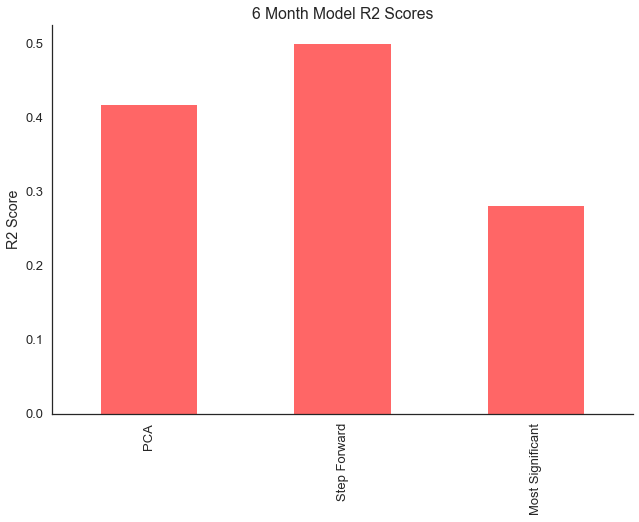

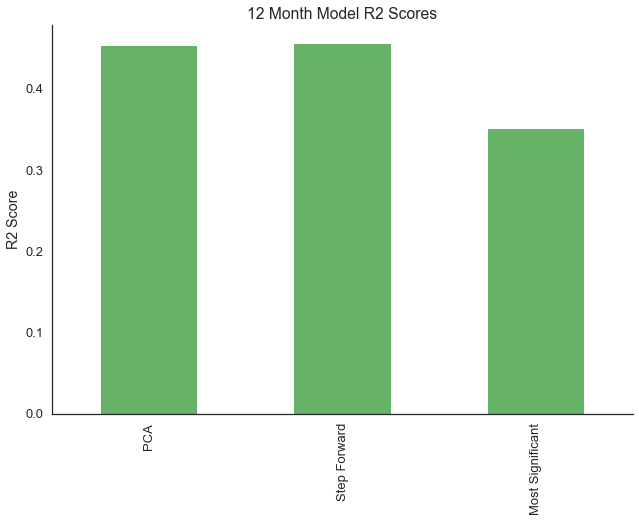

In [7]:
m06_scores.plot.bar(alpha = 0.6, color = 'r')
plt.ylabel("R2 Score")
sns.despine()
plt.gca().legend_.remove()
plt.title("6 Month Model R2 Scores")

m12_scores.plot.bar(alpha = 0.6, color = 'g')
plt.ylabel("R2 Score")
sns.despine()
plt.gca().legend_.remove()
plt.title("12 Month Model R2 Scores")

** Variance Comparisons **  In the following box plot graph, we observed a much smaller tail spread on the Step Forward box compared to the other models. This indicated lower variance in results, suggesting a more reliable predictive ability.

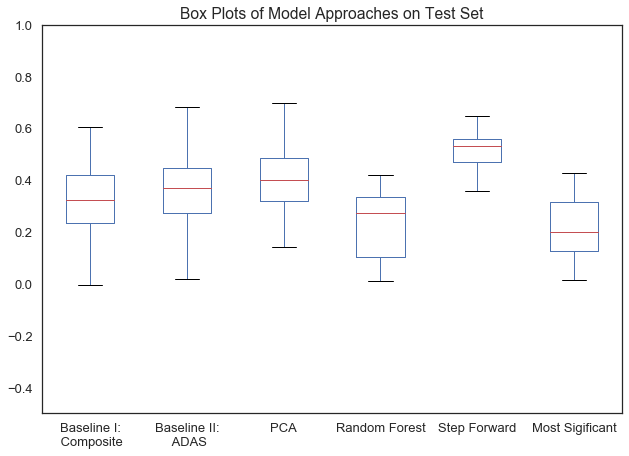

In [24]:
trial_bl = trial_data.loc[:][['Composite', 'ADAS', 'PCA_BL', 'RF', 'Step_BL', 'Sig_BL']]
trial_bl.columns = ["Baseline I:\n Composite", "Baseline II:\n ADAS", "PCA", "Random Forest", "Step Forward", "Most Sigificant"]
trial_bl.plot(kind = 'box')
plt.ylim(-0.5,1)
plt.title("Box Plots of Model Approaches on Test Set")

### Analysis of Predictors Selected

According to the one trial of the Step Forward variable selection model, the significant predictors were:

**Baseline Visit:**
- 'word_recall_0',
- 'number_cancellation_0',
- 'hmstepws',
- 'gdhappy_sc',
- 'cdorient_sc',
- 'faqtv_bl',
- 'faqshop_bl'

**6 Months**
- 'word_recall_06',
- 'number_cancellation_06',
- 'cdorient_06',
- 'mmfold_06',
- 'mmrepeat_06',
- 'construction_06',
- 'faqsource_06',
- 'npif_06',
- 'mmdraw_06'


**12 Months**

- 'word_recall_12',
- 'faqfinan_12',
- 'gdenergy_12',
- 'number_cancellation_12',
- 'cdorient_12',
- 'cdjudge_12',
- 'construction_12'

The ADAS fields "Word Recall" & "Number Cancellation" plus the CD field "Orient" were significant predictors over all visits. The other significant predictors only showed up in one visit each. Future work could be done to analyze which predictors recurred in multiple iterations of the Step Forward Variable Selection process. 